<a href="https://colab.research.google.com/github/sireorator/GFPGAN/blob/master/week_9_test_socioeconomic_hypotheses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this script we are going to build a database with word frequencies, and then add socioeconomic data. We are going to use the example of testing Big Numbers (>4) vs. small numbers (2,3,4)

## Step 1: build word frequencies

In [1]:
#Bags of The Words

small_numbers = ['two','three','four']
big_numbers = ['five','six','seven','eight','nine','ten']


In [2]:
## We are going to use a database of movies, and will retrieve the data from IMDB
!pip install IMDbPY
import imdb
ia = imdb.IMDb(accessSystem='http')

     |████████████████████████████████| 298 kB 7.4 MB/s 


In [3]:
import os
from os import path

## This function organizes corpus as list of sentences, and each sentence as a list of words,
## as input to the function WordVec

## Collect preprocessed texts in txt format
root_folder = os.getcwd()
print(root_folder)

## this is a list which will store the relevant data to the dataframe
data_to_df =[]

## This iterates over your path, folders and subfolders looking for txt files
for path, subdirs, files in os.walk(root_folder):
    i=0
    for file in files[:]:

        ## list where we will store the relevant data for this text 
        text_data = []

        ## list in which we will stored tokenized text
        tokenized_text = []
        
        if '.txt' in file:
            i+=1
            print(file, i)

            ## extract title
            text = file.split('_')[0]
            
            ## Acess IMDB and retrieve director and year
            search = ia.search_movie(text)

            ## Retrive only information about movies with this title, and ignore TV shows
            it = 0
            for item in search:
                
                ID = search[it].movieID
                movie = ia.get_movie(ID)
                try: 
                    kind = movie['kind']
                    if kind == 'movie':
            
                        author = movie['directors'][0]['name']
                        year = int(movie['year'])
                        break
                    else:
                        it +=1
                except KeyError:
                    author = ''
                    year=0
            

            ## we get the full path and open the file
            file_text = open(file, encoding = 'utf-8').read()

            ## this creates the list of paragraphs - lines
            text_list_paragraphs = file_text.split('\n')

            ## this will clean the paragraphs further -- getting read of \r at the end of the line
            for paragraph in text_list_paragraphs:
                #print (paragraph)
                
                paragraph = paragraph.replace('\r', '')

                ## we add the paragraphs to the word2vec input list
                tokenized_text += paragraph.split(' ')

            ## we add each text's data
            text_data = [author,year,text,list(filter(None,tokenized_text)),list(filter(None,text_list_paragraphs))]

            data_to_df += [text_data]

/content
blackrain_dialog.txt 1
startrekgenerations_dialog.txt 2
strangedays_dialog.txt 3
jackiebrown_dialog.txt 4
fugitivethe_dialog.txt 5
12monkeys_dialog.txt 6
bookofelithe_dialog.txt 7
whileshewasout_dialog.txt 8
slumdogmillionaire_dialog.txt 9
silenceofthelambs_dialog.txt 10
peggysuegotmarried_dialog.txt 11
talentedmrripleythe_dialog.txt 12
castaway_dialog.txt 13
pianothe_dialog.txt 14
mulhollanddrive_dialog.txt 15
lifeofdavidgalethe_dialog.txt 16
fatalinstinct_dialog.txt 17
hannibal_dialog.txt 18
beingthere_dialog.txt 19
avengersthe_dialog.txt 20
burnafterreading_dialog.txt 21
juno_dialog.txt 22
cruelintentions_dialog.txt 23
transformersthemovie_dialog.txt 24
carrie_dialog.txt 25
bladeii_dialog.txt 26
ghostandthedarknessthe_dialog.txt 27
stepmom_dialog.txt 28
jayandsilentbobstrikeback_dialog.txt 29
raisingarizona_dialog.txt 30
croupier_dialog.txt 31
leavinglasvegas_dialog.txt 32
assassins_dialog.txt 33
godfatherpartii_dialog.txt 34
witness_dialog.txt 35
huntforredoctoberthe_dialo

In [4]:
for item in(data_to_df):
  print(item)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['Peter Berg', 2007, 'kingdomthe', ['written', 'by', 'we', 'be', 'in', 'a', 'kindergarten', 'classroom', 'of', 'all', 'sitting', 'on', 'the', 'floor', 'leg', 'cross', 'sitting', 'in', 'front', 'of', 'the', 'kid', 'be', 'little', 'flank', 'by', 'he', 'mom', 'and', 'he', 'dad', 'in', 'a', 'dark', 'suit', 'little', 'kevin', 'have', 'a', 'large', 'cardboard', 'square', 'with', 'picture', 'from', 'different', 'stage', 'of', 'he', 'life', 'taped', 'to', 'it', 'he', 'be', 'telling', 'the', 'class', 'about', 'the', 'photo', 'we', 'be', 'the', 'picture', 'the', 'young', 'face', 'fleury', 'this', 'be', 'i', 'Fredricksburg', 'house', 'and', 'i', 'grandma', 'ruth', 'playing', 'with', 'i', 'skateboard', 'ramp', 'it', 'be', 'a', 'tony', 'hawk', 'jump', 'ramp', 'little', 'girl', 'raise', 'she', 'hand', 'mick', 'silence', 'from', 'mick', 'i', 'forget', 'what', 'i', 'be', 'going', 'to', 'say', 'kevin', 'point', 'to', 'another', 'picture', 'this', 'be', 'i', 'at', 'i', 'second', 'birthday', 'party', 'wi

In [7]:
for item in data_to_df[1]:
  print(item)

David Carson
1994
startrekgenerations
['moore', 'brannon', 'braga', 'march', 'there', 'he', 'be', 'there', 'to', 'the', 'south', 'what', 'be', 'you', 'blind', 'that', 'be', 'a', 'bird', 'repel', 'the', 'crystalline', 'trench', 'raft', 'down', 'lava', 'flow', 'orbital', 'skydiving', 'it', 'be', 'like', 'the', 'man', 'be', 'running', 'a', 'bloody', 'decathlon', 'across', 'the', 'galaxy', 're', 'sound', 'that', 'should', 'be', 'he', 'now', 'i', 'think', 'he', 'be', 'just', 'cross', 'the', 'sound', 'barrier', 'right', 'on', 'target', 'i', 'jump', 'out', 'over', 'the', 'arabian', 'peninsula', 'and', 'i', 'end', 'up', 'here', 'right', 'on', 'the', 'dime', 'actually', 'captain', 'you', 'precise', 'target', 'area', 'be', 'thirtyfive', 'meter', 'that', 'way', 'thanks', 'for', 'pointing', 'that', 'out', 'oh', 'i', 'have', 'warn', 'you', 'about', 'that', 'back', 'of', 'yours', 'you', 'should', 'have', 'a', 'doctor', 'take', 'a', 'look', 'at', 'it', 'tomorrow', 'i', 'want', 'to', 'make', 'a', 'tri

In [8]:
import pandas as pd

# Create the pandas DataFrame
df = pd.DataFrame(data_to_df, columns = ['author', 'year','title','tokenized_text','lines'])
  
# print dataframe.
df

,author,year,title,tokenized_text,lines
0,Ridley Scott,1989,blackrain,"[by, craig, Bolotin, warren, lewis, november, ...","[by, craig Bolotin, warren lewis, november, se..."
1,David Carson,1994,startrekgenerations,"[moore, brannon, braga, march, there, he, be, ...","[moore brannon braga, march, there he be there..."
2,Kathryn Bigelow,1995,strangedays,"[ready, yeah, boot, it, okay, it, be, going, i...","[ready, yeah, boot it, okay, it be going, i be..."
3,Quentin Tarantino,1997,jackiebrown,"[jackie, brown, screenplay, by, quentin, taran...","[jackie brown, screenplay by quentin tarantino..."
4,Andrew Davis,1993,fugitivethe,"[by, jeb, stuart, and, david, Twohy, richard, ...","[by, jeb stuart and david Twohy, richard, canc..."
...,...,...,...,...,...
955,John Whitesell,2003,malibusmostwanted,"[written, by, fax, bahr, adam, small, jamie, k...","[written by, fax bahr adam small, jamie kenned..."
956,Courtney Hunt,2008,frozenriver,"[written, by, courtney, hunt, sign, read, brid...","[written by, courtney hunt, sign read bridge t..."
957,David Fincher,1992,alien3,"[screenplay, by, john, fasano, story, by, vinc...","[screenplay by john fasano, story by vincent w..."
958,Bruce A. Evans,2007,mrbrooks,"[written, by, bruce, evans, raynold, gideon, g...","[written by, bruce evans raynold gideon, god g..."


In [9]:
## Create a function to calculate word counts of a particular bag of words
from collections import Counter

def count_BOW(bag_of_words,tokenized_text):
  count_occurences_of_each_word = Counter(tokenized_text)
  #print(count_occurences_of_each_word)

  total_bag_count = 0
  for word in bag_of_words:
    #print(word, count_occurences_of_each_word[word])

    total_bag_count += count_occurences_of_each_word[word]
  return(total_bag_count)


In [10]:
## count all the words in each text pertaining to the bag of words prosociality and autoritarianism

list_smallnumbers_counts=[]
list_bignumbers_counts=[]

for text in df['tokenized_text']:
  small_count = count_BOW(small_numbers, text)
  list_smallnumbers_counts+=[small_count]

  big_count = count_BOW(big_numbers, text)
  list_bignumbers_counts+=[big_count]

In [11]:
## Add the counts of bags of words to the dataFrame

df['Big_numbers'] = list_bignumbers_counts
df['Small_numbers'] = list_smallnumbers_counts

df

,author,year,title,tokenized_text,lines,Big_numbers,Small_numbers
0,Ridley Scott,1989,blackrain,"[by, craig, Bolotin, warren, lewis, november, ...","[by, craig Bolotin, warren lewis, november, se...",17,11
1,David Carson,1994,startrekgenerations,"[moore, brannon, braga, march, there, he, be, ...","[moore brannon braga, march, there he be there...",14,31
2,Kathryn Bigelow,1995,strangedays,"[ready, yeah, boot, it, okay, it, be, going, i...","[ready, yeah, boot it, okay, it be going, i be...",12,24
3,Quentin Tarantino,1997,jackiebrown,"[jackie, brown, screenplay, by, quentin, taran...","[jackie brown, screenplay by quentin tarantino...",61,51
4,Andrew Davis,1993,fugitivethe,"[by, jeb, stuart, and, david, Twohy, richard, ...","[by, jeb stuart and david Twohy, richard, canc...",13,21
...,...,...,...,...,...,...,...
955,John Whitesell,2003,malibusmostwanted,"[written, by, fax, bahr, adam, small, jamie, k...","[written by, fax bahr adam small, jamie kenned...",18,25
956,Courtney Hunt,2008,frozenriver,"[written, by, courtney, hunt, sign, read, brid...","[written by, courtney hunt, sign read bridge t...",17,44
957,David Fincher,1992,alien3,"[screenplay, by, john, fasano, story, by, vinc...","[screenplay by john fasano, story by vincent w...",9,9
958,Bruce A. Evans,2007,mrbrooks,"[written, by, bruce, evans, raynold, gideon, g...","[written by, bruce evans raynold gideon, god g...",17,28


In [12]:
## Calculate a Big to Small ratio

df['big-small-ratio'] = (df['Big_numbers'] - df['Small_numbers'])/(df['Big_numbers'] + df['Small_numbers'])

df

,author,year,title,tokenized_text,lines,Big_numbers,Small_numbers,big-small-ratio
0,Ridley Scott,1989,blackrain,"[by, craig, Bolotin, warren, lewis, november, ...","[by, craig Bolotin, warren lewis, november, se...",17,11,0.214286
1,David Carson,1994,startrekgenerations,"[moore, brannon, braga, march, there, he, be, ...","[moore brannon braga, march, there he be there...",14,31,-0.377778
2,Kathryn Bigelow,1995,strangedays,"[ready, yeah, boot, it, okay, it, be, going, i...","[ready, yeah, boot it, okay, it be going, i be...",12,24,-0.333333
3,Quentin Tarantino,1997,jackiebrown,"[jackie, brown, screenplay, by, quentin, taran...","[jackie brown, screenplay by quentin tarantino...",61,51,0.089286
4,Andrew Davis,1993,fugitivethe,"[by, jeb, stuart, and, david, Twohy, richard, ...","[by, jeb stuart and david Twohy, richard, canc...",13,21,-0.235294
...,...,...,...,...,...,...,...,...
955,John Whitesell,2003,malibusmostwanted,"[written, by, fax, bahr, adam, small, jamie, k...","[written by, fax bahr adam small, jamie kenned...",18,25,-0.162791
956,Courtney Hunt,2008,frozenriver,"[written, by, courtney, hunt, sign, read, brid...","[written by, courtney hunt, sign read bridge t...",17,44,-0.442623
957,David Fincher,1992,alien3,"[screenplay, by, john, fasano, story, by, vinc...","[screenplay by john fasano, story by vincent w...",9,9,0.000000
958,Bruce A. Evans,2007,mrbrooks,"[written, by, bruce, evans, raynold, gideon, g...","[written by, bruce evans raynold gideon, god g...",17,28,-0.244444


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


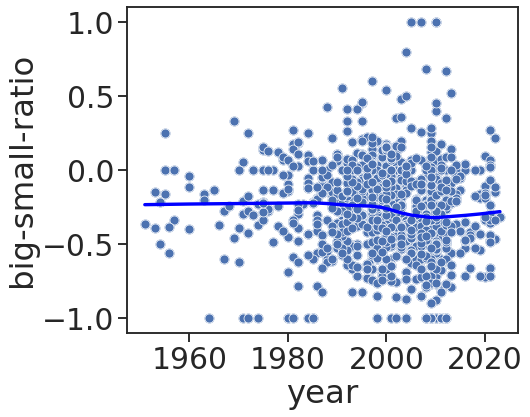

In [13]:
## Now we plot a time series using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

df2= df.loc[df["year"] > 1950]
            
#%matplotlib inline
sns.set()
sns.set_context("talk",font_scale=1.8)
sns.set_style("white")
sns.set_style("ticks")
plt.figure(figsize=(7, 6))

sns.regplot(data=df2, lowess=True, line_kws={"color": "blue"}, x="year", y="big-small-ratio")
sns.scatterplot(data=df2, x="year", y="big-small-ratio", ci=None)



In [14]:
df2.to_csv('movies_numbers.csv')

## Step 2: Add socioeconomic data 

In [15]:
### READ CSVS AS DATA FRAMES
base_dir1 = os.getcwd()

list_of_ratios = pd.read_csv(base_dir1 +'/movies_numbers.csv')

SOC_ECON_data  = pd.read_csv(base_dir1 +'/SOCI_ECON_movies.csv')




In [16]:
list_of_ratios

,Unnamed: 0,author,year,title,tokenized_text,lines,Big_numbers,Small_numbers,big-small-ratio
0,0,Ridley Scott,1989,blackrain,"['by', 'craig', 'Bolotin', 'warren', 'lewis', ...","['by', 'craig Bolotin', 'warren lewis', 'novem...",17,11,0.214286
1,1,David Carson,1994,startrekgenerations,"['moore', 'brannon', 'braga', 'march', 'there'...","['moore brannon braga', 'march', 'there he be ...",14,31,-0.377778
2,2,Kathryn Bigelow,1995,strangedays,"['ready', 'yeah', 'boot', 'it', 'okay', 'it', ...","['ready', 'yeah', 'boot it', 'okay', 'it be go...",12,24,-0.333333
3,3,Quentin Tarantino,1997,jackiebrown,"['jackie', 'brown', 'screenplay', 'by', 'quent...","['jackie brown', 'screenplay by quentin tarant...",61,51,0.089286
4,4,Andrew Davis,1993,fugitivethe,"['by', 'jeb', 'stuart', 'and', 'david', 'Twohy...","['by', 'jeb stuart and david Twohy', 'richard'...",13,21,-0.235294
...,...,...,...,...,...,...,...,...,...
930,955,John Whitesell,2003,malibusmostwanted,"['written', 'by', 'fax', 'bahr', 'adam', 'smal...","['written by', 'fax bahr adam small', 'jamie k...",18,25,-0.162791
931,956,Courtney Hunt,2008,frozenriver,"['written', 'by', 'courtney', 'hunt', 'sign', ...","['written by', 'courtney hunt', 'sign read bri...",17,44,-0.442623
932,957,David Fincher,1992,alien3,"['screenplay', 'by', 'john', 'fasano', 'story'...","['screenplay by john fasano', 'story by vincen...",9,9,0.000000
933,958,Bruce A. Evans,2007,mrbrooks,"['written', 'by', 'bruce', 'evans', 'raynold',...","['written by', 'bruce evans raynold gideon', '...",17,28,-0.244444


In [17]:
SOC_ECON_data

,year,GDPpc,Life expectancy,GINI household,GINI income dispersion,Incomepc,education,real wages,president,minimum wage,9_11
0,1901,NaN,49.299999,NaN,NaN,NaN,6.57,NaN,NaN,NaN,pre
1,1902,NaN,50.500000,NaN,NaN,NaN,6.66,NaN,NaN,NaN,pre
2,1903,NaN,50.599998,NaN,NaN,NaN,6.75,NaN,NaN,NaN,pre
3,1904,NaN,49.599998,NaN,NaN,NaN,6.84,NaN,NaN,NaN,pre
4,1905,NaN,50.299999,NaN,NaN,NaN,6.93,NaN,NaN,NaN,pre
...,...,...,...,...,...,...,...,...,...,...,...
118,2019,NaN,78.862000,0.484,0.465,39156.0,NaN,22.541110,R,92.708598,post
119,2020,NaN,NaN,NaN,NaN,NaN,NaN,23.370202,R,91.565310,post
120,2021,NaN,NaN,NaN,NaN,NaN,NaN,23.390210,D,89.079123,post
121,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,post


In [18]:
## function to add the corresponding socioeconomic value

def add_soc (year,var, dataset):

    var_year = list(SOC_ECON_data[var][1:])    
    dictionary_var = dict(zip(year, var_year))
    var_list = []
    for item in dataset[0:]['year']:
        print(item)
        var_list += [dictionary_var[item]]
    new_list_of_ratios[var] =var_list  

In [19]:
## add the corresponding socioeconomic value

new_list_of_ratios= list_of_ratios[:]
    
year = list(SOC_ECON_data['year'][1:])   

list_of_vars = ['GDPpc', 'Life expectancy', 'president','minimum wage','9_11']
for var in list_of_vars:
    add_soc(year, var, list_of_ratios[:])


1989
1994
1995
1997
1993
1995
2010
2008
2008
1991
1986
1999
1986
1993
2001
2003
1993
2001
2021
2019
2008
2007
1999
1986
1976
2002
1996
1998
2001
1987
1998
1995
1995
1974
1985
1990
2008
1997
1997
1997
1998
2007
1993
2007
2001
2004
1989
1987
2008
1997
1997
1955
2009
2009
1997
2000
1999
1990
2011
2008
1997
2009
2015
1996
1993
2002
2002
1992
1997
2002
1982
1989
1999
1995
1999
2004
1977
1991
2004
1986
1995
2009
2003
1996
2011
1994
1994
1994
2009
1990
2007
2005
2005
2013
2001
2007
1995
2019
2005
1997
2006
2004
2001
1992
1998
2001
2017
2011
1993
2014
2006
2008
2010
1999
1982
2020
2008
1986
2010
2020
2000
2006
2002
2013
1999
2009
2005
1985
2011
2009
2013
1993
1994
2011
2009
1971
1980
2009
1995
1997
1996
1979
2009
2014
2001
1990
1994
1999
1980
2022
1992
2007
2011
2008
1993
1995
1993
2006
2014
2014
1999
2011
2009
1955
2005
2017
1999
2004
2011
2009
2001
2002
1998
1998
1982
1998
2022
1990
1997
1986
2004
1974
2019
1990
1994
2003
2011
2019
2001
2007
1983
2005
2011
1982
2010
2009
2011
1997
1997
2020


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()



2021
1972
2010
2000
2010
1995
2016
1982
1988
2001
2005
2009
1996
1995
2012
2011
1995
2008
2009
2021
2012
1994
2001
1998
2011
2011
2000
1996
1986
1991
1972
2021
2011
1997
2013
2009
1997
1998
2000
2008
1996
2008
1956
2006
1963
2023
2009
1999
1965
1990
2003
2009
2000
1984
1997
2002
2008
2011
2001
2021
2000
2007
2008
2011
2001
2011
2004
1990
1986
2001
1998
2001
1982
1975
1993
1988
1999
1987
1987
1997
2015
1998
1999
2010
2001
2009
2012
1997
2009
1980
2001
2021
1997
1998
1996
2003
1978
2011
2006
2002
1995
2001
2000
2016
2010
1975
2021
1979
2010
1993
2000
2012
2008
1997
1990
1997
2004
1999
2010
2010
1993
2004
2001
2004
2019
2001
1966
1973
1954
1995
1998
1988
2006
2007
2013
1975
2000
1985
2005
2008
2014
2011
1997
2000
1993
1999
1997
1997
2008
1980
2003
1979
2012
2005
2012
2012
2011
2004
1982
2002
1972
1998
1994
1994
1990
1998
2003
1998
2018
1990
2020
2001
2009
2010
2010
1984
1991
1981
2005
1970
2016
1998
2004
1995
2005
2000
1994
2002
2004
2010
2011
2011
1999
2002
2002
1994
2004
1999
2009
2016

In [20]:
new_list_of_ratios

,Unnamed: 0,author,year,title,tokenized_text,lines,Big_numbers,Small_numbers,big-small-ratio,GDPpc,Life expectancy,president,minimum wage,9_11
0,0,Ridley Scott,1989,blackrain,"['by', 'craig', 'Bolotin', 'warren', 'lewis', ...","['by', 'craig Bolotin', 'warren lewis', 'novem...",17,11,0.214286,36008.680,75.107,R,88.371043,pre
1,1,David Carson,1994,startrekgenerations,"['moore', 'brannon', 'braga', 'march', 'there'...","['moore brannon braga', 'march', 'there he be ...",14,31,-0.377778,38579.215,75.896,D,93.736674,pre
2,2,Kathryn Bigelow,1995,strangedays,"['ready', 'yeah', 'boot', 'it', 'okay', 'it', ...","['ready', 'yeah', 'boot it', 'okay', 'it be go...",12,24,-0.333333,39214.816,76.062,D,91.176937,pre
3,3,Quentin Tarantino,1997,jackiebrown,"['jackie', 'brown', 'screenplay', 'by', 'quent...","['jackie brown', 'screenplay by quentin tarant...",61,51,0.089286,41664.156,76.376,D,99.430899,pre
4,4,Andrew Davis,1993,fugitivethe,"['by', 'jeb', 'stuart', 'and', 'david', 'Twohy...","['by', 'jeb stuart and david Twohy', 'richard'...",13,21,-0.235294,37376.816,75.728,R,96.168434,pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,955,John Whitesell,2003,malibusmostwanted,"['written', 'by', 'fax', 'bahr', 'adam', 'smal...","['written by', 'fax bahr adam small', 'jamie k...",18,25,-0.162791,46805.535,77.299,R,91.498225,post
931,956,Courtney Hunt,2008,frozenriver,"['written', 'by', 'courtney', 'hunt', 'sign', ...","['written by', 'courtney hunt', 'sign read bri...",17,44,-0.442623,50403.328,78.303,R,94.144820,post
932,957,David Fincher,1992,alien3,"['screenplay', 'by', 'john', 'fasano', 'story'...","['screenplay by john fasano', 'story by vincen...",9,9,0.000000,36672.102,75.562,R,99.027038,pre
933,958,Bruce A. Evans,2007,mrbrooks,"['written', 'by', 'bruce', 'evans', 'raynold',...","['written by', 'bruce evans raynold gideon', '...",17,28,-0.244444,50965.324,78.101,R,86.674038,post


In [21]:
  new_df = new_list_of_ratios.drop(['tokenized_text','lines'], axis=1)
  new_df

,Unnamed: 0,author,year,title,Big_numbers,Small_numbers,big-small-ratio,GDPpc,Life expectancy,president,minimum wage,9_11
0,0,Ridley Scott,1989,blackrain,17,11,0.214286,36008.680,75.107,R,88.371043,pre
1,1,David Carson,1994,startrekgenerations,14,31,-0.377778,38579.215,75.896,D,93.736674,pre
2,2,Kathryn Bigelow,1995,strangedays,12,24,-0.333333,39214.816,76.062,D,91.176937,pre
3,3,Quentin Tarantino,1997,jackiebrown,61,51,0.089286,41664.156,76.376,D,99.430899,pre
4,4,Andrew Davis,1993,fugitivethe,13,21,-0.235294,37376.816,75.728,R,96.168434,pre
...,...,...,...,...,...,...,...,...,...,...,...,...
930,955,John Whitesell,2003,malibusmostwanted,18,25,-0.162791,46805.535,77.299,R,91.498225,post
931,956,Courtney Hunt,2008,frozenriver,17,44,-0.442623,50403.328,78.303,R,94.144820,post
932,957,David Fincher,1992,alien3,9,9,0.000000,36672.102,75.562,R,99.027038,pre
933,958,Bruce A. Evans,2007,mrbrooks,17,28,-0.244444,50965.324,78.101,R,86.674038,post


In [23]:
### SAVE LIST AS CSV ###

new_df.to_csv('Numbers_freq_movies_SOCECON.csv') 